# SAP CX - AI/ML Intern Assignment

## Libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from IPython.display import Image, display
import nltk
nltk.download('stopwords')
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image, display
import os
import shutil
from sentence_transformers import SentenceTransformer
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import joblib
import requests
from io import BytesIO
from sentence_transformers import SentenceTransformer
import faiss
import json
import matplotlib.pyplot as plt
from typing import List

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kusum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data

In [4]:
df = pd.read_json(r"data\marketing_sample_for_amazon_com-amazon_fashion_products__20200201_20200430__30k_data.ldjson", lines=True)

In [74]:
df.head()

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,brand,...,colour,no__of_reviews,seller_name,seller_id,left_in_stock,no__of_offers,no__of_sellers,technical_details__k_v_pairs,formats___editions,name_of_author_for_books
0,26d41bdc1495de290bc8e6062d927729,2020-02-07 05:11:36 +0000,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LA' Facon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410c62298852e68f34c35560f2311e5a,2020-02-07 08:45:56 +0000,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52e31bb31680b0ec73de0d781a23cc0a,2020-02-06 11:09:38 +0000,B07WJ6WPN1,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LOVISTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25798d6dc43239c118452d1bee0fb088,2020-02-07 08:32:45 +0000,B07PYSF4WZ,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ad8a5a196d515ef09dfdaf082bdc37c4,2020-02-06 14:27:48 +0000,B082KXNM7X,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968070e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_price                    27110 non-null  float64
 11  weight                         30000 non-null  object 
 12  rating                         30000 non-null 

In [76]:
print((df.isnull().sum() / len(df)) * 100)

uniq_id                           0.000000
crawl_timestamp                   0.000000
asin                              0.000000
product_url                       0.000000
product_name                      0.000000
image_urls__small                 0.006667
medium                            0.006667
large                             3.863333
browsenode                        1.733333
brand                            27.143333
sales_price                       9.633333
weight                            0.000000
rating                            0.000000
sales_rank_in_parent_category    15.010000
sales_rank_in_child_category     17.163333
delivery_type                     0.000000
meta_keywords                     0.000000
amazon_prime__y_or_n              0.000000
parent___child_category__all     15.010000
best_seller_tag__y_or_n           0.000000
other_items_customers_buy        18.790000
product_details__k_v_pairs        3.943333
discount_percentage              51.253333
colour     

Important features
uniq_id


Text -> product name, meta keywords, parent child category


numeric -> product price, item weight, browse node??


image -> TAKE MEDIUM URL

In [ ]:
def get_product_info(df, uniq_id, image_width=200, image_height=200):
    if uniq_id not in df['uniq_id'].values:
        print(f"Product ID {uniq_id} not found.")
        return None

    row = df[df['uniq_id'] == uniq_id].iloc[0]

    image_url = row.get('medium', 'N/A')
    if image_url != 'N/A':
        display(Image(url=image_url, width=image_width, height=image_height))

    print(row['uniq_id'], "\n", row.get('brand', 'N/A'), "\n", row.get('product_name', 'N/A'), "\n", row.get('medium', 'N/A'))

In [12]:
get_product_info(df, 'a7cf70174a0011640d5a39fcff067612')

a7cf70174a0011640d5a39fcff067612 
 nan 
 Rangriti Women's Cotton Kurta 
 https://images-na.ssl-images-amazon.com/images/I/41-6Navz25L.jpg|https://images-na.ssl-images-amazon.com/images/I/41mD5j-4DBL.jpg|https://images-na.ssl-images-amazon.com/images/I/41jV0r4TAkL.jpg|https://images-na.ssl-images-amazon.com/images/I/51hX8Z4sQBL.jpg|https://images-na.ssl-images-amazon.com/images/I/41gej6kpKdL.jpg|https://images-na.ssl-images-amazon.com/images/I/514DYhpY6pL.jpg


In [11]:
for i in [
  "51a86cedd6924acf8a8c7dbcab699f82",
  "90f173a4d248c92a17f428fc3fa7da1d",
  "49d310d3c6ddc8fbc57b2471f06a1714",
  "dac216b2036af033afdfe6e60e3c4ca5",
  "08b4e02243ec8be5cd6b59b39294b784"]:
    get_product_info(df, i)

51a86cedd6924acf8a8c7dbcab699f82 
 nan 
 Rangriti Women's Cotton a-line Kurta 
 https://images-na.ssl-images-amazon.com/images/I/41FmfxA29TL.jpg|https://images-na.ssl-images-amazon.com/images/I/41CrsAe2OlL.jpg|https://images-na.ssl-images-amazon.com/images/I/41cAjLNOm0L.jpg|https://images-na.ssl-images-amazon.com/images/I/41xt1q1EnZL.jpg|https://images-na.ssl-images-amazon.com/images/I/41ZdDHuwh5L.jpg


90f173a4d248c92a17f428fc3fa7da1d 
 nan 
 Rangriti Women's Cotton A-Line Kurta 
 https://images-na.ssl-images-amazon.com/images/I/412J1q0ee8L.jpg|https://images-na.ssl-images-amazon.com/images/I/41i4eqwgcsL.jpg|https://images-na.ssl-images-amazon.com/images/I/41aZlD%2BQZEL.jpg|https://images-na.ssl-images-amazon.com/images/I/51-xvNwduHL.jpg|https://images-na.ssl-images-amazon.com/images/I/41GFTNK%2BTxL.jpg


49d310d3c6ddc8fbc57b2471f06a1714 
 nan 
 Rangriti Women's Cotton a-line Kurta 
 https://images-na.ssl-images-amazon.com/images/I/41gYsvvkoFL.jpg|https://images-na.ssl-images-amazon.com/images/I/41sbNqvQGRL.jpg|https://images-na.ssl-images-amazon.com/images/I/413SUhacMyL.jpg|https://images-na.ssl-images-amazon.com/images/I/51zw2JI3-1L.jpg|https://images-na.ssl-images-amazon.com/images/I/410pELhlQdL.jpg


dac216b2036af033afdfe6e60e3c4ca5 
 nan 
 Rangriti Women's Cotton a-line Kurta 
 https://images-na.ssl-images-amazon.com/images/I/41r7sQjRANL.jpg|https://images-na.ssl-images-amazon.com/images/I/319lhzdwPKL.jpg|https://images-na.ssl-images-amazon.com/images/I/41aUroCOxML.jpg|https://images-na.ssl-images-amazon.com/images/I/414o%2B1kHOyL.jpg|https://images-na.ssl-images-amazon.com/images/I/41XsO-ZoDiL.jpg|https://images-na.ssl-images-amazon.com/images/I/31u6vGSFzML.jpg


08b4e02243ec8be5cd6b59b39294b784 
 nan 
 Rangriti Women's Cotton a-line Kurta 
 https://images-na.ssl-images-amazon.com/images/I/41r7sQjRANL.jpg|https://images-na.ssl-images-amazon.com/images/I/319lhzdwPKL.jpg|https://images-na.ssl-images-amazon.com/images/I/41aUroCOxML.jpg|https://images-na.ssl-images-amazon.com/images/I/414o%2B1kHOyL.jpg|https://images-na.ssl-images-amazon.com/images/I/41XsO-ZoDiL.jpg|https://images-na.ssl-images-amazon.com/images/I/31u6vGSFzML.jpg


In [78]:
get_product_info(df, '52e31bb31680b0ec73de0d781a23cc0a')

52e31bb31680b0ec73de0d781a23cc0a 
 LOVISTA 
 LOVISTA Cotton Gota Patti Tassel Traditional Printed Kurti with Pant,Angrakha Salwar Suit 
 https://images-na.ssl-images-amazon.com/images/I/31Gd40UmBTL.jpg|https://images-na.ssl-images-amazon.com/images/I/31jiPD9IyQL.jpg|https://images-na.ssl-images-amazon.com/images/I/41GLhLnUCGL.jpg


# Playground

In [ ]:
# Imputing seller name by similarity
def combine_text_features(row):
    return f"{str(row['product_name'])} {str(row['brand'])} {str(row['meta_keywords'])}"

def impute_seller_by_similarity(df, threshold=0.9):
    df = df.copy()
    df['combined_text'] = df.apply(combine_text_features, axis=1)

    known = df[df['seller_name'].notnull()]
    unknown = df[df['seller_name'].isnull()]

    vectorizer = TfidfVectorizer(max_features=5000)
    known_vecs = vectorizer.fit_transform(known['combined_text'])
    unknown_vecs = vectorizer.transform(unknown['combined_text'])

    similarity_matrix = cosine_similarity(unknown_vecs, known_vecs)

    top_match_indices = similarity_matrix.argmax(axis=1)
    top_match_scores = similarity_matrix.max(axis=1)

    for i, score in enumerate(top_match_scores):
        if score >= threshold:
            matched_index = known.index[top_match_indices[i]]
            matched_seller = known.loc[matched_index, 'seller_name']
            df.loc[unknown.index[i], 'seller_name'] = matched_seller

    return df

### Imputing Seller_ID and Seller_Name (DOESN'T WORK)

In [ ]:
def combine_text_features(row):
    return f"{str(row['product_name'])} {str(row['brand'])} {str(row['meta_keywords'])}"

def impute_seller_id_by_similarity(df, threshold=0.8):
    df = df.copy()
    df['combined_text'] = df.apply(combine_text_features, axis=1)

    known = df[df['seller_id'].notnull()]
    unknown = df[df['seller_id'].isnull()]

    vectorizer = TfidfVectorizer(max_features=5000)
    known_vecs = vectorizer.fit_transform(known['combined_text'])
    unknown_vecs = vectorizer.transform(unknown['combined_text'])

    similarity_matrix = cosine_similarity(unknown_vecs, known_vecs)

    top_match_indices = similarity_matrix.argmax(axis=1)
    top_match_scores = similarity_matrix.max(axis=1)

    filled_count = 0

    for i, score in enumerate(top_match_scores):
        if score >= threshold:
            matched_index = known.index[top_match_indices[i]]
            matched_id = known.loc[matched_index, 'seller_id']
            df.loc[unknown.index[i], 'seller_id'] = matched_id
            filled_count += 1

    print(f"Filled {filled_count} missing seller_id values using similarity (threshold = {threshold})")
    return df

def backfill_seller_name_from_id(df):
    df = df.copy()
    id_to_name = df[df['seller_name'].notnull()].set_index('seller_id')['seller_name'].to_dict()
    before_nulls = df['seller_name'].isnull().sum()

    df['seller_name'] = df.apply(
        lambda row: id_to_name.get(row['seller_id'], row['seller_name']),
        axis=1
    )

    after_nulls = df['seller_name'].isnull().sum()
    print(f" Backfilled seller_name using seller_id — reduced missing from {before_nulls} to {after_nulls}")
    return df

In [ ]:
df = impute_seller_id_by_similarity(df, threshold=0.75)
df = backfill_seller_name_from_id(df)

In [35]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

print(missing_percentage)

uniq_id                           0.000000
crawl_timestamp                   0.000000
asin                              0.000000
product_url                       0.000000
product_name                      0.000000
image_urls__small                 0.006667
medium                            0.006667
large                             3.863333
browsenode                        1.733333
brand                            27.143333
sales_price                       9.633333
weight                            0.000000
rating                            0.000000
sales_rank_in_parent_category    15.010000
sales_rank_in_child_category     17.163333
delivery_type                     0.000000
meta_keywords                     0.000000
amazon_prime__y_or_n              0.000000
parent___child_category__all     15.010000
best_seller_tag__y_or_n           0.000000
other_items_customers_buy        18.790000
product_details__k_v_pairs        3.943333
discount_percentage              51.253333
colour     

Went down by only 30 percent

### Introducing numeric features

In [ ]:
df = pd.read_json('data/marketing_sample_for_amazon_com-amazon_fashion_products__20200201_20200430__30k_data.ldjson', lines=True)
df = df.fillna('')

# Prepare Text Features
df['text_blob'] = (
    df['product_name'].astype(str) + ' ' +
    df['meta_keywords'].astype(str) + ' ' +
    df['parent___child_category__all'].astype(str)
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['text_blob'])

# Prepare Numerical Features
df['product_price'] = pd.to_numeric(df['sales_price'], errors='coerce').fillna(0)
df['item_weight'] = pd.to_numeric(df['weight'], errors='coerce').fillna(0)
df['browse_nodes'] = df['browsenode'].apply(lambda x: len(x) if isinstance(x, list) else 0)

scaler = MinMaxScaler()
numeric_matrix = scaler.fit_transform(df[['product_price', 'item_weight', 'browse_nodes']])

# Similarity Search Function
def find_similar_products(product_id: str, num_similar: int = 5, text_weight: float = 0.8, num_weight: float = 0.2):
    if product_id not in df['uniq_id'].values:
        raise ValueError("Product not found.")

    idx = df[df['uniq_id'] == product_id].index[0]

    text_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    num_sim = cosine_similarity([numeric_matrix[idx]], numeric_matrix).flatten()

    combined_sim = text_weight * text_sim + num_weight * num_sim
    similar_indices = combined_sim.argsort()[::-1][1:num_similar + 1]

    results = df.iloc[similar_indices][['uniq_id', 'product_name', 'product_price', 'item_weight', 'medium']]
    return results

# 5. Pray this works
product_id = '52e31bb31680b0ec73de0d781a23cc0a'
similar_products = find_similar_products(product_id, num_similar=5)
display(similar_products)

,uniq_id,product_name,product_price,item_weight,medium
3893,f48f58d0cf1f78aa1407960acb7fdc5b,"EXPORTHOUSE Angrakha Designer Kurti,3/4 Sleeve...",593.0,999999999.0,https://images-na.ssl-images-amazon.com/images...
13763,60c4bf636fdbd48146eadf7556f8d4e5,Arayna Women's Long Embroidered Rayon A-Line K...,599.0,999999999.0,https://images-na.ssl-images-amazon.com/images...
12547,55ec8c4606174c024b7149338f7d698b,Paridhan Fashion Women's Cotton Rayon gota Pat...,0.0,999999999.0,https://images-na.ssl-images-amazon.com/images...
18577,76526163e7039c80fb92688c3b9e5d5e,Jaipuri Creations Women's Art Silk Bandhej Sui...,1049.0,999999999.0,https://images-na.ssl-images-amazon.com/images...
19662,8ca7316a51ee78c61628c0ad2934cb7a,ADORSY Premium Gota Patti Embroided A Line Kur...,799.0,999999999.0,https://images-na.ssl-images-amazon.com/images...


In [ ]:


def get_product_info(df, uniq_id, image_width=200, image_height=200):
    if uniq_id not in df['uniq_id'].values:
        print(f"Product ID {uniq_id} not found.")
        return None

    row = df[df['uniq_id'] == uniq_id].iloc[0]

    image_url = row.get('medium', 'N/A')
    if image_url != 'N/A':
        display(Image(url=image_url, width=image_width, height=image_height))

    print("Product ID:", row['uniq_id'])
    print("Brand:", row.get('brand', 'N/A'))
    print("Name:", row.get('product_name', 'N/A'))
    print("Image URL:", image_url)
    print("=" * 80)

product_id = '52e31bb31680b0ec73de0d781a23cc0a' 
print("Input Product:")
get_product_info(df, product_id)

print("\n Top Similar Products:")
similar_products = find_similar_products(product_id, num_similar=5, num_weight=1, text_weight=0)

for uid in similar_products['uniq_id']:
    get_product_info(df, uid)

Input Product:


Product ID: 52e31bb31680b0ec73de0d781a23cc0a
Brand: LOVISTA
Name: LOVISTA Cotton Gota Patti Tassel Traditional Printed Kurti with Pant,Angrakha Salwar Suit
Image URL: https://images-na.ssl-images-amazon.com/images/I/31Gd40UmBTL.jpg|https://images-na.ssl-images-amazon.com/images/I/31jiPD9IyQL.jpg|https://images-na.ssl-images-amazon.com/images/I/41GLhLnUCGL.jpg

 Top Similar Products:


Product ID: 1e11c76d9f45d3afb69e60dd8dea2ed7
Brand: Pantaloons Junior
Name: Pantaloons Junior Boys Sweatshirt
Image URL: https://images-na.ssl-images-amazon.com/images/I/51xf3LhTL9L.jpg|https://images-na.ssl-images-amazon.com/images/I/41uq7fyYwQL.jpg|https://images-na.ssl-images-amazon.com/images/I/51C9XyY5p9L.jpg


Product ID: 608e3f9bfef60e2472429c2b4f437fc3
Brand: 
Name: Aurelia Women's Cotton A-Line Kurta
Image URL: https://images-na.ssl-images-amazon.com/images/I/31RPKn0uq1L.jpg|https://images-na.ssl-images-amazon.com/images/I/31OC-FrSwCL.jpg|https://images-na.ssl-images-amazon.com/images/I/31Jmk9K4piL.jpg|https://images-na.ssl-images-amazon.com/images/I/41ABgdhkPBL.jpg|https://images-na.ssl-images-amazon.com/images/I/31jl8yHE8wL.jpg


Product ID: 84bff9e74ed7d58e1a5ae12d6a69587b
Brand: 
Name: Amazon Brand - Jam & Honey Girl's Tribal Regular fit Cotton T-Shirt (Pack of 3)
Image URL: https://images-na.ssl-images-amazon.com/images/I/41%2BD6A1yyAL.jpg|https://images-na.ssl-images-amazon.com/images/I/41NKq9lp5uL.jpg|https://images-na.ssl-images-amazon.com/images/I/31MHbqBxp5L.jpg|https://images-na.ssl-images-amazon.com/images/I/31Hm9JDtSoL.jpg


Product ID: e334f901db3940e7b92fdfb41d13b448
Brand: I AM FOR YOU
Name: I AM FOR YOU Black Viscose Rayon Strapless Sleeveless Dress for Women & Girls
Image URL: https://images-na.ssl-images-amazon.com/images/I/41wZ3fGirfL.jpg|https://images-na.ssl-images-amazon.com/images/I/31aspQsrGkL.jpg|https://images-na.ssl-images-amazon.com/images/I/41OV4g1HX9L.jpg|https://images-na.ssl-images-amazon.com/images/I/31qN9bVvg6L.jpg|https://images-na.ssl-images-amazon.com/images/I/41ELpVz9ObL.jpg


Product ID: e827fb0c9104e2b6472d67bd07417be6
Brand: 
Name: Aurelia Women's Straight Fit Kurta
Image URL: https://images-na.ssl-images-amazon.com/images/I/41GIzoa70wL.jpg|https://images-na.ssl-images-amazon.com/images/I/31Gwp6YfmoL.jpg|https://images-na.ssl-images-amazon.com/images/I/310WSONGzaL.jpg|https://images-na.ssl-images-amazon.com/images/I/51Ipl3IHlZL.jpg|https://images-na.ssl-images-amazon.com/images/I/51ZB%2BO-ZxWL.jpg


In [8]:
!pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 18.4 MB/s eta 0:00:00


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected") # GPU isn't working?

False
No GPU detected


Combined embedding search engine. (Takes too long to run)

In [ ]:
# Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Clear Previous Cache
cache_dir = "cache"
if os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)
os.makedirs(cache_dir, exist_ok=True)

# Load Data
df = pd.read_json(
    'data/marketing_sample_for_amazon_com-amazon_fashion_products__20200201_20200430__30k_data.ldjson', 
    lines=True
)
df = df.fillna('')

# Text Embeddings using SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

df['text_blob'] = (
    df['product_name'].astype(str) + ' ' +
    df['meta_keywords'].astype(str) + ' ' +
    df['parent___child_category__all'].astype(str)
)

print("Encoding text embeddings...")
text_embeddings = model.encode(df['text_blob'].tolist(), show_progress_bar=True, device=device)

#Numerical Feature Embeddings
df['product_price'] = pd.to_numeric(df['sales_price'], errors='coerce').fillna(0)
df['item_weight'] = pd.to_numeric(df['weight'], errors='coerce').fillna(0)
df['browse_nodes'] = df['browsenode'].apply(lambda x: len(x) if isinstance(x, list) else 0)

scaler = MinMaxScaler()
numeric_matrix = scaler.fit_transform(df[['product_price', 'item_weight', 'browse_nodes']])

# Image Embeddings using ResNet
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

resnet = models.resnet50(pretrained=True)
resnet = resnet.to(device)
resnet.eval()

def get_image_embedding(image_url):
    try:
        response = requests.get(image_url, timeout=5)
        if response.status_code != 200:
            raise Exception(f"Status code: {response.status_code}")
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            embedding = resnet(img)
        return embedding.squeeze().cpu().numpy()
    except Exception as e:
        print(f"[WARN] Failed to process image ({image_url}): {e}")
        return np.zeros(1000)  # Final FC layer of resnet50 is 1000 dim

print("Encoding image embeddings...")
image_embeddings = []
for idx, row in df.iterrows():
    url = row.get('medium', '')
    if url:
        embedding = get_image_embedding(url)
    else:
        embedding = np.zeros(1000)
    image_embeddings.append(embedding)

image_embeddings = np.array(image_embeddings)

# Save EVERYTHING
np.save(os.path.join(cache_dir, 'text_embeddings.npy'), text_embeddings)
np.save(os.path.join(cache_dir, 'numeric_matrix.npy'), numeric_matrix)
np.save(os.path.join(cache_dir, 'image_embeddings.npy'), image_embeddings)
joblib.dump(scaler, os.path.join(cache_dir, 'numeric_scaler.pkl'))

print("\n Embeddings saved!")
print(f"Text embeddings shape:   {text_embeddings.shape}")
print(f"Numeric matrix shape:    {numeric_matrix.shape}")
print(f"Image embeddings shape:  {image_embeddings.shape}")

## TF-IDF (Text similarity) [BACKUP]

In [ ]:
# Polars maybe?
df = pd.read_json('data/marketing_sample_for_amazon_com-amazon_fashion_products__20200201_20200430__30k_data.ldjson', lines=True)

def calculate_similarity():
    global tfidf_matrix, vectorizer, df

    # Fill missing string fields and create text blob
    df = df.copy()
    string_columns = df.select_dtypes(include=['object']).columns
    df[string_columns] = df[string_columns].fillna('')

    df['text_blob'] = (
        df['product_name'].astype(str) + ' ' +
        df['meta_keywords'].astype(str) + ' ' +
        df['parent___child_category__all'].astype(str)
    )

    # TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['text_blob'])


def find_similar_products(product_id: str, num_similar: int) -> List[str]:
    if product_id not in df['uniq_id'].values:
        return []

    index = df[df['uniq_id'] == product_id].index[0]
    similarities = cosine_similarity(tfidf_matrix[index], tfidf_matrix).flatten()
    similar_indices = similarities.argsort()[::-1][1:num_similar + 1]
    similar_ids = df.iloc[similar_indices]['uniq_id'].tolist()

    return similar_ids


In [82]:
calculate_similarity()
similar_products = find_similar_products("52e31bb31680b0ec73de0d781a23cc0a", 5)
for i in similar_products:
    get_product_info(df, i)

f48f58d0cf1f78aa1407960acb7fdc5b 
 EXPORTHOUSE 
 EXPORTHOUSE Angrakha Designer Kurti,3/4 Sleeve and Gota Patti Hand Work V-Neck Solid Rayon Kurti for Women - (Peach Color) 
 https://images-na.ssl-images-amazon.com/images/I/31PXqbMZHzL.jpg|https://images-na.ssl-images-amazon.com/images/I/31pYJJDP4fL.jpg|https://images-na.ssl-images-amazon.com/images/I/41SrPW%2BnTYL.jpg|https://images-na.ssl-images-amazon.com/images/I/31oBkDAOrxL.jpg|https://images-na.ssl-images-amazon.com/images/I/51jAVSbKeFL.jpg


60c4bf636fdbd48146eadf7556f8d4e5 
 Arayna 
 Arayna Women's Long Embroidered Rayon A-Line Kurti with Gota Patti Work, Yellow 
 https://images-na.ssl-images-amazon.com/images/I/31ojG8SsWvL.jpg|https://images-na.ssl-images-amazon.com/images/I/415dlLm-7fL.jpg|https://images-na.ssl-images-amazon.com/images/I/41dbLHMfr7L.jpg|https://images-na.ssl-images-amazon.com/images/I/41VAnnrWVYL.jpg|https://images-na.ssl-images-amazon.com/images/I/41-lfVD3wNL.jpg


080db30b23948ba0308b011ed8050d03 
 GENIALHUB 
 GENIALHUB Women's Cotton Salwar Suit (SSDPNKWTVL0000156_Free Size_PINK) 
 https://images-na.ssl-images-amazon.com/images/I/418VlxNW0oL.jpg


55ec8c4606174c024b7149338f7d698b 
 Paridhan Fashion 
 Paridhan Fashion Women's Cotton Rayon gota Patti Work Anarkali Kurti 
 https://images-na.ssl-images-amazon.com/images/I/410XVeprOBL.jpg|https://images-na.ssl-images-amazon.com/images/I/41d8qo3odSL.jpg|https://images-na.ssl-images-amazon.com/images/I/31lAPJFfp3L.jpg|https://images-na.ssl-images-amazon.com/images/I/31%2B1g3fsFZL.jpg|https://images-na.ssl-images-amazon.com/images/I/311OeP4niNL.jpg


76526163e7039c80fb92688c3b9e5d5e 
 Jaipuri Creations 
 Jaipuri Creations Women's Art Silk Bandhej Suit with Heavy Gota Patti Work 
 https://images-na.ssl-images-amazon.com/images/I/51klvKhav5L.jpg


## FAISS

In [5]:
!pip install sentence-transformers faiss-cpu

  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached faiss_cpu-1.10.0-cp313-cp313-win_amd64.whl.metadata (4.5 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached torch-2.6.0-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached charset_nor

In [ ]:
df = pd.read_json('data/marketing_sample_for_amazon_com-amazon_fashion_products__20200201_20200430__30k_data.ldjson', lines=True)

# Preprocess text
def preprocess(df):
    df = df.copy()
    df.fillna('', inplace=True)

    # Convert each column to string type to ensure safe concatenation
    df['product_name'] = df['product_name'].astype(str)
    df['meta_keywords'] = df['meta_keywords'].astype(str)
    df['parent___child_category__all'] = df['parent___child_category__all'].astype(str)

    # Combine the columns into a single text blob
    df['text_blob'] = df['product_name'] + ' ' + df['meta_keywords'] + ' ' + df['parent___child_category__all']
    
    return df

df = preprocess(df)

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['text_blob'].tolist(), show_progress_bar=True)

# Index creation 
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # Use L2 similarity (Hyper-Spherical embedding space)
index.add(np.array(embeddings))

# Search function
def find_similar_products_faiss(product_id: str, num_similar: int = 5) -> list:
    if product_id not in df['uniq_id'].values:
        return []

    idx = df[df['uniq_id'] == product_id].index[0]
    query_vector = np.array([embeddings[idx]])

    distances, indices = index.search(query_vector, num_similar + 1)
    similar_indices = indices[0][1:]  # Skip self

    return df.iloc[similar_indices]['uniq_id'].tolist()

C:\Users\Kusum\AppData\Local\Temp\ipykernel_4784\2947633800.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)
c:\Users\Kusum\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Kusum\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either n

In [16]:
similar_products = find_similar_products_faiss("52e31bb31680b0ec73de0d781a23cc0a", num_similar=5)
get_product_info(df, "52e31bb31680b0ec73de0d781a23cc0a")
for i in similar_products:
    get_product_info(df, i)

52e31bb31680b0ec73de0d781a23cc0a 
 LOVISTA 
 LOVISTA Cotton Gota Patti Tassel Traditional Printed Kurti with Pant,Angrakha Salwar Suit 
 https://images-na.ssl-images-amazon.com/images/I/31Gd40UmBTL.jpg|https://images-na.ssl-images-amazon.com/images/I/31jiPD9IyQL.jpg|https://images-na.ssl-images-amazon.com/images/I/41GLhLnUCGL.jpg


5f4a1a3a1035b0cdcbd054df9d136662 
 Vedana 
 Vedana Women's Cotton Ikat Print Grey Kurta with Machina Katha stitch Open Jacket 
 https://images-na.ssl-images-amazon.com/images/I/419sPI9NimL.jpg|https://images-na.ssl-images-amazon.com/images/I/41XJY2%2B84mL.jpg|https://images-na.ssl-images-amazon.com/images/I/41fGwX9NFBL.jpg|https://images-na.ssl-images-amazon.com/images/I/41ySuwRCUNL.jpg


8e6d866c28dd16adc1cc66f8e693b71c 
 riwaz 
 riwaz full stitched kurti pant plazo rayon for women 
 https://images-na.ssl-images-amazon.com/images/I/31Ol-PTvngL.jpg|https://images-na.ssl-images-amazon.com/images/I/310sVBAdfPL.jpg|https://images-na.ssl-images-amazon.com/images/I/41RThD21eiL.jpg


4590ceaa09e0c2cb85bc5ef52847c404 
 KOUTURE 
 KOUTURE Cotton Kurta 
 https://images-na.ssl-images-amazon.com/images/I/31gzhmnBLaL.jpg|https://images-na.ssl-images-amazon.com/images/I/31R5twBGMyL.jpg|https://images-na.ssl-images-amazon.com/images/I/31biOsTRhJL.jpg|https://images-na.ssl-images-amazon.com/images/I/31FyFxNT1TL.jpg|https://images-na.ssl-images-amazon.com/images/I/31WMawMgNPL.jpg


cf9dd8ea471f288fb246570fcbb48f38 
 KOUTURE 
 KOUTURE Cotton Kurta 
 https://images-na.ssl-images-amazon.com/images/I/31gzhmnBLaL.jpg|https://images-na.ssl-images-amazon.com/images/I/31R5twBGMyL.jpg|https://images-na.ssl-images-amazon.com/images/I/31biOsTRhJL.jpg|https://images-na.ssl-images-amazon.com/images/I/31FyFxNT1TL.jpg|https://images-na.ssl-images-amazon.com/images/I/31WMawMgNPL.jpg


1e2f744de3fd1cc73aa59906593e6691 
 VAIDIKI 
 VAIDIKI Cotton Kurta 
 https://images-na.ssl-images-amazon.com/images/I/310WrglonRL.jpg|https://images-na.ssl-images-amazon.com/images/I/31uGxuhiPBL.jpg|https://images-na.ssl-images-amazon.com/images/I/31nYW3prAXL.jpg|https://images-na.ssl-images-amazon.com/images/I/31qMMXpS4-L.jpg


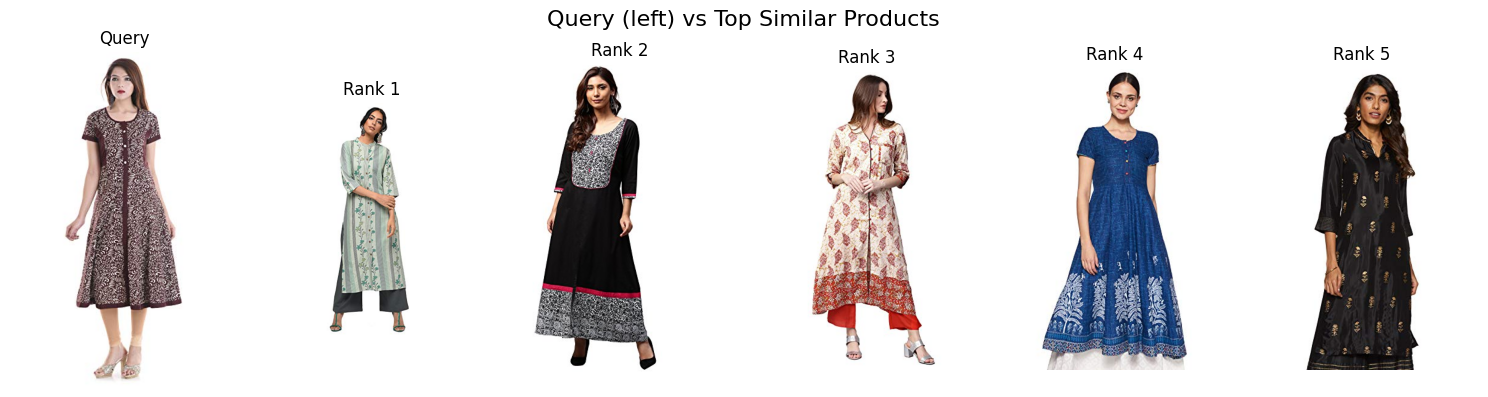

In [ ]:
text_embeddings = np.load("cache/text_embeddings.npy")
numeric_embeddings = np.load("cache/numeric_matrix.npy")
image_embeddings = np.load("cache/image_embeddings.npy")

# Combine embeddings
combined_embeddings = np.hstack([text_embeddings, numeric_embeddings, image_embeddings])

# FAISS index and id map
index = faiss.read_index("cache/faiss_index.idx")
with open("cache/id_map.json", "r") as f:
    id_map = json.load(f)

df = pd.read_json("data/marketing_sample_for_amazon_com-amazon_fashion_products__20200201_20200430__30k_data.ldjson", lines=True)

def fetch_image(url):
    try:
        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img
    except:
        return Image.new("RGB", (224, 224), color=(255, 255, 255))  # Blank image fallback

def display_similar_images(uniq_id, k=5):
    try:
        query_idx = id_map.index(uniq_id)
        query_vector = combined_embeddings[query_idx].reshape(1, -1)
        D, I = index.search(query_vector, k + 1)

        similar_indices = [i for i in I[0] if id_map[i] != uniq_id][:k]
        similar_ids = [id_map[i] for i in similar_indices]

        # Plot
        fig, axes = plt.subplots(1, k + 1, figsize=(15, 4))
        fig.suptitle("Query (left) vs Top Similar Products", fontsize=16) # Other function is not working, this should look better. Do not use in final app.

        # Query image
        query_row = df[df['uniq_id'] == uniq_id].iloc[0]
        query_img = fetch_image(query_row.get('medium', ''))
        axes[0].imshow(query_img)
        axes[0].set_title("Query")
        axes[0].axis("off")

        # Similar images
        for i, sid in enumerate(similar_ids):
            sim_row = df[df['uniq_id'] == sid].iloc[0]
            sim_img = fetch_image(sim_row.get('medium', ''))
            axes[i + 1].imshow(sim_img)
            axes[i + 1].set_title(f"Rank {i + 1}")
            axes[i + 1].axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"[ERROR] {e}")

# Run it
display_similar_images("36750450b31384b7e7123d61c4d35649", k=5) 